In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
source1 = "Zillow/Zip_MedianListingPrice_AllHomes.csv"
salesprice_df = pd.read_csv(source1)
salesprice_df.head()

,RegionName,City,State,Metro,CountyName,SizeRank,2010-01,2010-02,2010-03,2010-04,...,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10
0,10025,New York,NY,New York-Newark-Jersey City,New York County,1,795000.0,775000.0,799000.0,744500.0,...,1050000.0,1149500.0,1275000.0,1224500.0,1195000.0,1195000.0,1195000.0,1199000.0,1195000.0,1195000.0
1,60657,Chicago,IL,Chicago-Naperville-Elgin,Cook County,2,389900.0,380950.0,369900.0,375000.0,...,445000.0,439950.0,445000.0,450000.0,462250.0,464900.0,460000.0,459900.0,458000.0,450000.0
2,10023,New York,NY,New York-Newark-Jersey City,New York County,3,NaN,NaN,NaN,NaN,...,1795000.0,1750000.0,1695000.0,1700000.0,1786500.0,1750000.0,1725000.0,1752500.0,1820000.0,1800000.0
3,77494,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,4,287478.0,286808.0,290495.0,289900.0,...,350000.0,354450.0,350000.0,355990.0,355000.0,359978.5,359900.0,365000.0,365000.0,359700.0
4,60614,Chicago,IL,Chicago-Naperville-Elgin,Cook County,5,482400.0,469000.0,459000.0,449000.0,...,675000.0,669900.0,650000.0,630000.0,615000.0,600000.0,599000.0,599000.0,619900.0,649000.0


In [3]:
df_NY_saleprice.head()

NameError: name 'df_NY_saleprice' is not defined

In [4]:
#Restricted to months of interest
df_trim_salesprice = salesprice_df[['RegionName','City','2018-09','2018-10','2018-11','2018-12','2019-01','2019-02','2019-03']]
df_trim_salesprice.head()

#Restricted to NY City Zipcodes only
df_NY_saleprice = df_trim_salesprice[df_trim_salesprice['City'] == 'New York']

#Renaming columns
df_NY_saleprice = df_NY_saleprice.rename(columns = {'RegionName':'Zipcode'})
df_NY_saleprice

#df_NY_saleprice.loc[df_NY_saleprice['Zipcode'] == 10025]

#Restricting to Broklyn Zipcodes
Ltrain_zipcodes = [11211,11206,11207,11221,11237,11236,11234,11239]
df_LTrain_saleprice = df_NY_saleprice[df_NY_saleprice['Zipcode'].isin(Ltrain_zipcodes)]
df_LTrain_saleprice

,Zipcode,City,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03
39,11206,New York,650500.0,722500.0,697000.0,636000.0,636000.0,649000.0,650000.0
60,11221,New York,725000.0,699000.0,739000.0,725000.0,699000.0,695000.0,722500.0
80,11207,New York,485000.0,487000.0,492500.0,492500.0,495000.0,498000.0,498500.0
99,11211,New York,1140000.0,1150000.0,1100400.0,1150000.0,1150000.0,1184365.0,1150000.0
110,11234,New York,642000.0,649000.0,645000.0,650000.0,639900.0,644000.0,654500.0
241,11236,New York,489950.0,499000.0,499000.0,499000.0,519000.0,499000.0,499000.0


In [5]:
source2 = "Zillow/Zip_MedianRentalPrice_AllHomes.csv"
rentalprice_df = pd.read_csv(source2)
rentalprice_df.head()

,RegionName,City,State,Metro,CountyName,SizeRank,2010-02,2010-03,2010-04,2010-05,...,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10
0,10025,New York,NY,New York-Newark-Jersey City,New York County,1,NaN,NaN,NaN,NaN,...,3400.0,3400.0,3400.0,3400.0,3500.0,3495.0,3440.0,3500.0,3500.0,3500.0
1,60657,Chicago,IL,Chicago-Naperville-Elgin,Cook County,2,NaN,NaN,NaN,NaN,...,1800.0,1741.5,1800.0,1895.0,1950.0,1900.0,1912.5,2000.0,1937.5,1950.0
2,10023,New York,NY,New York-Newark-Jersey City,New York County,3,NaN,NaN,3425.0,3275.0,...,3700.0,3600.0,3500.0,3575.0,3695.0,3587.5,3550.0,3600.0,3600.0,3696.0
3,77494,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,4,NaN,NaN,NaN,NaN,...,2000.0,2050.0,2100.0,2100.0,2100.0,2100.0,2100.0,2100.0,2100.0,2100.0
4,60614,Chicago,IL,Chicago-Naperville-Elgin,Cook County,5,NaN,NaN,NaN,NaN,...,2095.0,2000.0,2100.0,2250.0,2300.0,2250.0,2100.0,2200.0,2254.0,2249.0


In [6]:
#Restricted to months of interest
df_trim_rentalprice = rentalprice_df[['RegionName','City','2018-09','2018-10','2018-11','2018-12','2019-01','2019-02','2019-03']]
df_trim_rentalprice.head()

#Restricted to NY City Zipcodes only
df_NY_rentalprice = df_trim_rentalprice[df_trim_rentalprice['City']== 'New York']

#Renaming columns
df_NY_rentalprice = df_NY_rentalprice.rename(columns = {'RegionName':'Zipcode'})

#Restricting to Broklyn Zipcodes
Ltrain_zipcodes = [11211,11206,11207,11221,11237,11236,11234,11239]
df_LTrain_rentalprice = df_NY_rentalprice[df_NY_rentalprice['Zipcode'].isin(Ltrain_zipcodes)]
df_LTrain_rentalprice

,Zipcode,City,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03
60,11221,New York,2592.5,2500.0,2400.0,2295.0,2400.0,2600.0,2699.5
96,11211,New York,2996.5,2850.0,2875.0,2933.0,2941.5,3049.5,3195.0
103,11234,New York,2300.0,2325.0,2350.0,2300.0,2200.0,2490.0,2500.0


In [7]:
source3 = "Zillow/Sale_Counts_Zip.csv"
SaleCounts_df = pd.read_csv(source3)
SaleCounts_df.head()

,RegionID,RegionName,StateName,SizeRank,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,...,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,seasAdj
0,61639,10025,New York,1,NaN,NaN,NaN,NaN,NaN,NaN,...,34.0,47.0,57.0,36.0,68.0,79.0,66.0,60.0,55.0,0
1,84654,60657,Illinois,2,NaN,NaN,NaN,NaN,NaN,NaN,...,77.0,111.0,161.0,194.0,159.0,188.0,144.0,125.0,130.0,0
2,61637,10023,New York,3,NaN,NaN,NaN,NaN,NaN,NaN,...,42.0,62.0,40.0,60.0,83.0,76.0,83.0,89.0,89.0,0
3,91982,77494,Texas,4,59.0,80.0,85.0,101.0,120.0,97.0,...,116.0,187.0,219.0,238.0,239.0,277.0,220.0,179.0,NaN,0
4,84616,60614,Illinois,5,NaN,NaN,NaN,NaN,NaN,NaN,...,78.0,150.0,177.0,207.0,216.0,203.0,192.0,163.0,137.0,0


In [8]:
#Restricted to months of interest
df_trim_SaleCounts = SaleCounts_df[['RegionName','StateName','2018-09','2018-10','2018-11','2018-12','2019-01','2019-02','2019-03']]
df_trim_SaleCounts.head()

#Restricted to NY City Zipcodes only
df_NY_SaleCounts = df_trim_SaleCounts[df_trim_SaleCounts['StateName']== 'New York']

#Renaming columns
df_NY_SaleCounts = df_NY_SaleCounts.rename(columns = {'RegionName':'Zipcode'})

#Restricting to Broklyn Zipcodes
Ltrain_zipcodes = [11211,11206,11207,11221,11237,11236,11234,11239]
df_LTrain_SalesCounts = df_NY_SaleCounts[df_NY_SaleCounts['Zipcode'].isin(Ltrain_zipcodes)]
df_LTrain_SalesCounts

#Restricting to New York City Zipcodes
Ltrain_zipcodes = [11211,11206,11207,11221,11237,11236,11234,11239]
df_LTrain_SalesCounts = df_NY_SaleCounts[df_NY_SaleCounts['Zipcode'].isin(Ltrain_zipcodes)]
df_LTrain_SalesCounts

,Zipcode,StateName,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03
36,11206,New York,5.0,12,6,9.0,11.0,17.0,11.0
55,11221,New York,8.0,4,4,4.0,1.0,2.0,4.0
74,11207,New York,5.0,17,7,10.0,13.0,12.0,11.0
92,11211,New York,11.0,23,13,14.0,18.0,20.0,6.0
231,11236,New York,16.0,22,8,18.0,20.0,23.0,22.0
1905,11237,New York,4.0,1,1,1.0,1.0,1.0,2.0
6221,11239,New York,1.0,0,1,0.0,0.0,0.0,1.0


In [9]:
#Restricitng data from New York State to New York City
NYC_zipcodes = [10001, 10002, 10003, 10004, 10005, 10006, 10007, 10008, 10009, 10010, 10011, 10012, 10013, 10014, 10016, 10017, 10018, 10019, 10020, 10021, 10022, 10023, 10024, 10025, 10026, 10027, 10028, 10029, 10030, 10031, 10032, 10033, 10034, 10035, 10036, 10037, 10038, 10039, 10040, 10041, 10043, 10044, 10045, 10055, 10060, 10065, 10069, 10075, 10080, 10081, 10087, 10090, 10095, 10101, 10102, 10103, 10104, 10105, 10106, 10107, 10108, 10109, 10110, 10111, 10112, 10113, 10114, 10115, 10116, 10117, 10118, 10119, 10120, 10121, 10122, 10123, 10124, 10125, 10126, 10128, 10129, 10130, 10131, 10132, 10133, 10138, 10150, 10151, 10152, 10153, 10154, 10155, 10156, 10157, 10158, 10159, 10160, 10161, 10162, 10163, 10164, 10165, 10166, 10167, 10168, 10169, 10170, 10171, 10172, 10173, 10174, 10175, 10176, 10177, 10178, 10179, 10185, 10199, 10203, 10211, 10212, 10213, 10242, 10249, 10256, 10257, 10258, 10259, 10260, 10261, 10265, 10268, 10269, 10270, 10271, 10272, 10273, 10274, 10275, 10276, 10277, 10278, 10279, 10280, 10281, 10282, 10285, 10286, 10292]
df_NYC_SalesCounts = df_NY_SaleCounts[df_NY_SaleCounts['Zipcode'].isin(NYC_zipcodes)]
df_NYC_SalesCounts

,Zipcode,StateName,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03
0,10025,New York,60.0,45,63,50.0,74.0,34.0,47.0
2,10023,New York,56.0,86,56,68.0,78.0,42.0,62.0
6,10002,New York,13.0,21,15,26.0,12.0,17.0,20.0
13,10016,New York,50.0,75,69,60.0,48.0,55.0,51.0
20,10009,New York,15.0,15,13,15.0,3.0,5.0,10.0
24,10011,New York,68.0,74,57,51.0,56.0,48.0,56.0
26,10128,New York,57.0,61,52,48.0,80.0,48.0,66.0
45,10019,New York,50.0,53,55,58.0,61.0,54.0,48.0
47,10003,New York,50.0,43,34,51.0,42.0,36.0,50.0
64,10024,New York,42.0,46,45,66.0,38.0,42.0,59.0


In [10]:
df_NYC_SalesCounts #Sales Count for New York City
df_NYC_SalesCounts.to_csv("Zillow Listings/df_NYC_SalesCounts.csv",index=False)
df_LTrain_SalesCounts #Sales Count for L Train Zipcodes 
df_LTrain_SalesCounts.to_csv("Zillow Listings/df_LTrain_SalesCounts.csv",index=False)

df_NY_saleprice #Median Sale Price for New York City
df_NY_saleprice.to_csv("Zillow Listings/df_NY_saleprice.csv",index=False)
df_LTrain_saleprice #Median Sale Price for L Train Zipcodes
df_LTrain_saleprice.to_csv("Zillow Listings/df_LTrain_saleprice.csv",index=False)


#df_NY_rentalprice #Median Rental Price for New York City
#df_LTrain_rentalprice #Median Rental Price for L Train Zipcodes

In [22]:
df_LTrain_saleprice.reset_index(drop = True)

,Zipcode,City,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03
0,11206,New York,650500.0,722500.0,697000.0,636000.0,636000.0,649000.0,650000.0
1,11221,New York,725000.0,699000.0,739000.0,725000.0,699000.0,695000.0,722500.0
2,11207,New York,485000.0,487000.0,492500.0,492500.0,495000.0,498000.0,498500.0
3,11211,New York,1140000.0,1150000.0,1100400.0,1150000.0,1150000.0,1184365.0,1150000.0
4,11234,New York,642000.0,649000.0,645000.0,650000.0,639900.0,644000.0,654500.0
5,11236,New York,489950.0,499000.0,499000.0,499000.0,519000.0,499000.0,499000.0


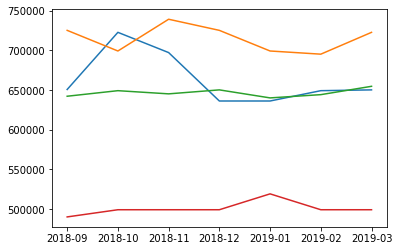

In [95]:
row_list = []
dates = list(df_LTrain_saleprice.columns[2:9])

for index,row in df_LTrain_saleprice.iterrows():
    zipcode_list = [row[dates[0]] , row[dates[1]], row[dates[2]], row[dates[3]], row[dates[4]], row[dates[5]], row[dates[6]]]
    row_list.append(zipcode_list)
# for x in enumerate(row_list):
#     plt.plot(dates,row_list[x])
    
plt.plot(dates,row_list[0],row_list[1])
plt.plot(dates,row_list[4])
plt.plot(dates,row_list[5])

In [66]:
row_list

[[650500.0, 722500.0, 697000.0, 636000.0, 636000.0, 649000.0, 650000.0],
 [725000.0, 699000.0, 739000.0, 725000.0, 699000.0, 695000.0, 722500.0],
 [485000.0, 487000.0, 492500.0, 492500.0, 495000.0, 498000.0, 498500.0],
 [1140000.0, 1150000.0, 1100400.0, 1150000.0, 1150000.0, 1184365.0, 1150000.0],
 [642000.0, 649000.0, 645000.0, 650000.0, 639900.0, 644000.0, 654500.0],
 [489950.0, 499000.0, 499000.0, 499000.0, 519000.0, 499000.0, 499000.0],
 [489950.0, 489950.0, 489950.0, 489950.0, 489950.0, 489950.0, 489950.0]]